Using CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

d:\upwork2\chinese_russian\venv\Lib\site-packages\torch\utils\data\dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


[0.00] [苗<。$ /颜色选择
[0.35] (蓝朋友"  都喜欢的休闲裤~
[0.81] 显瘦百搭  个性时髦精你想要的这里都有
[0.00] ~4[川/比  4/5 ~4/5「5/天 0戌45 「}6 ~0  _[6  5
[0.99] 亚麻色
[0.99] 黑色


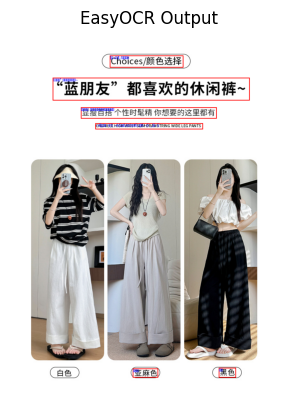

✔ Saved as output_easyocr.jpg


In [1]:
import easyocr
import cv2
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# Initialize reader for Chinese
reader = easyocr.Reader(['ch_sim'], gpu=False)

# Image path
image_path = 'D:\\upwork2\\chinese_russian\\data\\img1.jpg'
results = reader.readtext(image_path)

# Draw on image
img = Image.open(image_path).convert("RGB")
draw = ImageDraw.Draw(img)

for (bbox, text, confidence) in results:
    print(f"[{confidence:.2f}] {text}")
    pts = [tuple(point) for point in bbox]
    draw.line(pts + [pts[0]], fill="red", width=2)
    draw.text(pts[0], text, fill="blue")

# Show result
plt.imshow(img)
plt.axis("off")
plt.title("EasyOCR Output")
plt.show()

# Save
img.save("output_easyocr.jpg")
print("✔ Saved as output_easyocr.jpg")


In [2]:
# step1_and_2_ocr_translate.py

import easyocr
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from googletrans import Translator

# Step 1: OCR with EasyOCR
def extract_chinese_text(image_path):
    reader = easyocr.Reader(['ch_sim', 'en'], gpu=False)
    results = reader.readtext(image_path)

    chinese_texts = []
    boxes = []

    for bbox, text, conf in results:
        # Check if the string has any Chinese characters
        if any('\u4e00' <= ch <= '\u9fff' for ch in text):
            chinese_texts.append(text)
            boxes.append(bbox)

    return chinese_texts, boxes

# Step 2: Translate to Russian
def translate_to_russian(texts):
    translator = Translator()
    translations = []
    for txt in texts:
        try:
            translated = translator.translate(txt, src='zh-cn', dest='ru')
            translations.append(translated.text)
        except Exception as e:
            translations.append(f"[翻译失败: {txt}]")
    return translations

# Visual display function (optional)
def preview_results(image_path, boxes, original_texts, translated_texts):
    image = cv2.imread(image_path)
    for box, orig, trans in zip(boxes, original_texts, translated_texts):
        pts = np.array(box, dtype=np.int32)
        cv2.polylines(image, [pts], isClosed=True, color=(0, 255, 0), thickness=2)
        cv2.putText(image, trans, tuple(pts[0]), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

    # Convert to RGB and show with PIL
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    Image.fromarray(image_rgb).show()

# ----------- MAIN -----------
if __name__ == "__main__":
    image_path = "D:\\upwork2\\chinese_russian\\data\\img1.jpg"  # Change to your input image

    chinese_texts, boxes = extract_chinese_text(image_path)
    russian_texts = translate_to_russian(chinese_texts)

    print("[✔] OCR Chinese Texts:")
    print(chinese_texts)
    print("\n[✔] Russian Translations:")
    print(russian_texts)

    preview_results(image_path, boxes, chinese_texts, russian_texts)


Using CPU. Note: This module is much faster with a GPU.
d:\upwork2\chinese_russian\venv\Lib\site-packages\torch\utils\data\dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


[✔] OCR Chinese Texts:
['Choices /颜色选择', '(蓝朋友"  都喜欢的休闲裤~', '显瘦百搭  个性时髦精你想要的这里都有', '亚麻色', '黑色']

[✔] Russian Translations:
['Выбор / выбор цвета', '(Голубые друзья »все как обычные штаны ~', 'Похудение и универсальное, стильное и стильное, вы хотите здесь', 'Цвет льна', 'черный']


In [3]:
#step 1 + step 2 + step3 
# full_pipeline_ch_to_ru.py

import easyocr
from googletrans import Translator
import cv2
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import os

# CONFIG
IMAGE_PATH = "D:\\upwork2\\chinese_russian\\data\\img1.jpg"
FONT_PATH = "arial.ttf"  # You can use Russian-supporting font like 'DejaVuSans.ttf'
FONT_SIZE = 20

# Step 1: Extract Chinese text using EasyOCR
def extract_chinese_text(image_path):
    reader = easyocr.Reader(['ch_sim', 'en'], gpu=False)
    results = reader.readtext(image_path)

    chinese_texts = []
    boxes = []

    for bbox, text, conf in results:
        if any('\u4e00' <= ch <= '\u9fff' for ch in text):
            chinese_texts.append(text)
            boxes.append(bbox)

    return chinese_texts, boxes

# Step 2: Translate to Russian
def translate_to_russian(texts):
    translator = Translator()
    translations = []
    for txt in texts:
        try:
            translated = translator.translate(txt, src='zh-cn', dest='ru')
            translations.append(translated.text)
        except Exception:
            translations.append("[Ошибка перевода]")
    return translations

# Step 3: Replace text in image
def replace_text_in_image(image_path, boxes, translated_texts):
    # Load image
    image = Image.open(image_path).convert("RGB")
    draw = ImageDraw.Draw(image)
    font = ImageFont.truetype(FONT_PATH, FONT_SIZE)

    for box, translated_text in zip(boxes, translated_texts):
        # Get bounding box
        x_coords = [int(pt[0]) for pt in box]
        y_coords = [int(pt[1]) for pt in box]
        min_x, max_x = min(x_coords), max(x_coords)
        min_y, max_y = min(y_coords), max(y_coords)

        # Draw white rectangle over original text
        draw.rectangle([min_x, min_y, max_x, max_y], fill="white")

        # Overlay Russian text
        draw.text((min_x, min_y), translated_text, font=font, fill="black")

    return image

# ---------------- MAIN ----------------
if __name__ == "__main__":
    if not os.path.exists(IMAGE_PATH):
        raise FileNotFoundError(f"Image not found: {IMAGE_PATH}")

    print("🔍 Step 1: Extracting Chinese text...")
    chinese_texts, boxes = extract_chinese_text(IMAGE_PATH)
    print("Detected Chinese Texts:", chinese_texts)

    print("\n🌐 Step 2: Translating to Russian...")
    russian_texts = translate_to_russian(chinese_texts)
    print("Translated Russian Texts:", russian_texts)

    print("\n🖼 Step 3: Replacing in image...")
    result_img = replace_text_in_image(IMAGE_PATH, boxes, russian_texts)

    output_path = "output_replaced.jpg"
    result_img.save(output_path)
    print(f"✅ Output saved to: {output_path}")

    # Show the final result
    result_img.show()


Using CPU. Note: This module is much faster with a GPU.


🔍 Step 1: Extracting Chinese text...


d:\upwork2\chinese_russian\venv\Lib\site-packages\torch\utils\data\dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Detected Chinese Texts: ['Choices /颜色选择', '(蓝朋友"  都喜欢的休闲裤~', '显瘦百搭  个性时髦精你想要的这里都有', '亚麻色', '黑色']

🌐 Step 2: Translating to Russian...
Translated Russian Texts: ['Выбор / выбор цвета', '(Голубые друзья »все как обычные штаны ~', 'Похудение и универсальное, стильное и стильное, вы хотите здесь', 'Цвет льна', 'черный']

🖼 Step 3: Replacing in image...
✅ Output saved to: output_replaced.jpg


In [ ]:
import easyocr
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv, find_dotenv
import google.generativeai as genai

# === Load Gemini API key from .env ===
_ = load_dotenv(find_dotenv())
api_key = os.environ.get("OPENAI_API_KEY")  # Your key should be named OPENAI_API_KEY in .env
if not api_key:
    raise ValueError("API Key not found. Make sure .env file has OPENAI_API_KEY=<your_key>")
genai.configure(api_key=api_key)

# === Constants ===
IMAGE_PATH = "img1.jpg"              # Input image with Chinese text
FONT_PATH = "simfang.ttf"            # Path to Chinese/Russian font (must support Cyrillic)
OUTPUT_PATH = "output_translated.jpg"

# === Step 1: OCR ===
def detect_chinese_text(image_path):
    print("🔍 Running OCR with EasyOCR...")
    reader = easyocr.Reader(['ch_sim'], gpu=False)
    results = reader.readtext(image_path)
    boxes = [r[0] for r in results]
    texts = [r[1] for r in results]
    return boxes, texts

# === Step 2: Translation ===
def translate_to_russian(texts):
    print("🌍 Translating Chinese → Russian using Gemini...")
    model = genai.GenerativeModel('gemini-pro')
    translated_texts = []
    for t in texts:
        prompt = f"Translate the following Chinese to Russian: '{t}'"
        try:
            response = model.generate_content(prompt)
            translated_texts.append(response.text.strip())
        except Exception as e:
            print(f"[!] Translation failed for '{t}' → Using fallback: {e}")
            translated_texts.append(t)
    return translated_texts

# === Step 3: Replace Chinese with Russian ===
def replace_text_on_image(image_path, boxes, new_texts):
    print("🖌 Replacing text on image...")
    image = Image.open(image_path).convert("RGB")
    draw = ImageDraw.Draw(image)

    for box, text in zip(boxes, new_texts):
        x_coords = [int(pt[0]) for pt in box]
        y_coords = [int(pt[1]) for pt in box]
        min_x, max_x = min(x_coords), max(x_coords)
        min_y, max_y = min(y_coords), max(y_coords)
        width, height = max_x - min_x, max_y - min_y

        # Fill the original region with white
        draw.rectangle([min_x, min_y, max_x, max_y], fill="white")

        # Dynamic font size
        font_size = height - 2
        font = ImageFont.truetype(FONT_PATH, font_size)

        while font.getsize(text)[0] > width and font_size > 10:
            font_size -= 1
            font = ImageFont.truetype(FONT_PATH, font_size)

        # Center alignment
        text_width, text_height = font.getsize(text)
        text_x = min_x + (width - text_width) // 2
        text_y = min_y + (height - text_height) // 2

        draw.text((text_x, text_y), text, fill="black", font=font)

    return image

# === Main Execution ===
if __name__ == "__main__":
    boxes, chinese_texts = detect_chinese_text(IMAGE_PATH)
    russian_texts = translate_to_russian(chinese_texts)
    translated_img = replace_text_on_image(IMAGE_PATH, boxes, russian_texts)

    translated_img.save(OUTPUT_PATH)
    print(f"[✔] Final translated image saved at: {OUTPUT_PATH}")

    # Optional display
    plt.imshow(translated_img)
    plt.axis("off")
    plt.title("Russian Translated Output")
    plt.show()
